In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties

In [2]:
df = pd.read_csv("./股票作业.csv")

In [3]:
#（1）统计跌幅超过-3%（即暴跌日）有多少天，并把这些天的历史数据打印出来
close_yesterday_list = []
for i in df["close"]:
    close_yesterday_list.append(i)
close_yesterday_list.insert(0,df["close"][0])
del close_yesterday_list[-1]
close_yesterday = pd.Series(close_yesterday_list)
data = pd.concat([df,close_yesterday],axis=1)
data.columns= ["time","open","close","close_yesterday"]
result1 = data[(data["close"]/data["close_yesterday"]-1)<-0.03]
print("跌幅超过-3%（即暴跌日）有:"+str(result1.count()["time"])+"天")
print()
print("跌幅超过-3%（即暴跌日）的历史数据为:")
print(result1)

跌幅超过-3%（即暴跌日）有:134天

跌幅超过-3%（即暴跌日）的历史数据为:
            time     open    close  close_yesterday
150    2005/8/18  1194.44  1148.04          1192.83
324    2006/5/16  1658.69  1613.25          1664.09
329    2006/5/23  1647.96  1604.55          1657.69
340     2006/6/7  1678.24  1589.55          1679.13
366    2006/7/13  1736.21  1655.77          1740.00
489    2007/1/12  2745.32  2668.11          2770.11
498    2007/1/25  2946.50  2857.36          2975.13
502    2007/1/31  2926.07  2786.34          2930.56
504     2007/2/2  2791.49  2673.21          2785.43
516    2007/2/27  3048.83  2771.79          3040.60
553    2007/4/19  3610.02  3449.02          3612.40
566    2007/5/15  4055.83  3899.18          4046.39
577    2007/5/30  4087.41  4053.09          4334.92
580     2007/6/4  3981.82  3670.40          4000.74
594    2007/6/22  4230.97  4091.45          4230.82
595    2007/6/25  4102.79  3941.08          4091.45
598    2007/6/28  4080.19  3914.20          4078.60
603     2007/7/5  3769

In [4]:
#（2）统计出暴跌日接下来一天（第二天）的涨幅，并打印出接下来这一天的历史数据
lists = list(result1.index+1)
result2 = data.iloc[[i for i in lists]]
print("暴跌日接下来一天（第二天）的涨幅:")
result2_rate_of_increase = result2["close"]/result2["close_yesterday"]-1
print()
print(result2_rate_of_increase)

暴跌日接下来一天（第二天）的涨幅:

151     0.001864
325     0.007376
330    -0.008495
341     0.001220
367     0.005701
490     0.047446
499     0.008819
503    -0.000327
505    -0.022696
517     0.039426
554     0.039194
567     0.022276
578     0.013955
581     0.026346
595    -0.036752
596     0.008193
599    -0.023887
604     0.045765
623     0.024920
652     0.011471
674    -0.001241
679     0.004897
689    -0.002717
699     0.009624
739    -0.072173
740     0.031427
744     0.008746
758    -0.040672
759     0.010888
769     0.004722
          ...   
2549    0.024139
2552    0.057636
2557    0.004593
2565   -0.016792
2581    0.012259
2583   -0.042723
2584   -0.084907
2585   -0.076307
2586   -0.012708
2599    0.048946
2620    0.014473
2647    0.002651
2672   -0.002594
2675    0.019651
2677    0.002042
2681    0.004436
2685    0.012526
2688   -0.005175
2705    0.009470
2778    0.003219
3185   -0.018213
3188    0.007758
3213   -0.006039
3270    0.002720
3343    0.001657
3346    0.009077
3445    0.01

In [5]:
print("暴跌日接下来一天（第二天的历史数据）:")
print()
print(result2)

暴跌日接下来一天（第二天的历史数据）:

            time     open    close  close_yesterday
151    2005/8/19  1144.46  1150.18          1148.04
325    2006/5/17  1613.23  1625.15          1613.25
330    2006/5/24  1609.74  1590.92          1604.55
341     2006/6/8  1576.43  1591.49          1589.55
367    2006/7/14  1641.14  1665.21          1655.77
490    2007/1/15  2660.07  2794.70          2668.11
499    2007/1/26  2805.96  2882.56          2857.36
503     2007/2/1  2744.81  2785.43          2786.34
505     2007/2/5  2658.07  2612.54          2673.21
517    2007/2/28  2734.59  2881.07          2771.79
554    2007/4/20  3460.90  3584.20          3449.02
567    2007/5/16  3890.81  3986.04          3899.18
578    2007/5/31  4006.28  4109.65          4053.09
581     2007/6/5  3564.43  3767.10          3670.40
595    2007/6/25  4102.79  3941.08          4091.45
596    2007/6/26  3863.25  3973.37          3941.08
599    2007/6/29  3824.29  3820.70          3914.20
604     2007/7/6  3599.82  3781.35         

In [6]:
#（3）统计暴跌日第二天涨幅>0%的有多少天，并统计第二天涨幅之和。
result3 = result2_rate_of_increase[result2_rate_of_increase.values>0]
print("暴跌日第二天涨幅>0%的有:"+str(result3.count())+"天")
result3_add = 0
for i in result3.values:
    result3_add+=i
print("第二天涨幅之和为:"+str(result3_add))

暴跌日第二天涨幅>0%的有:84天
第二天涨幅之和为:1.4233460458118914


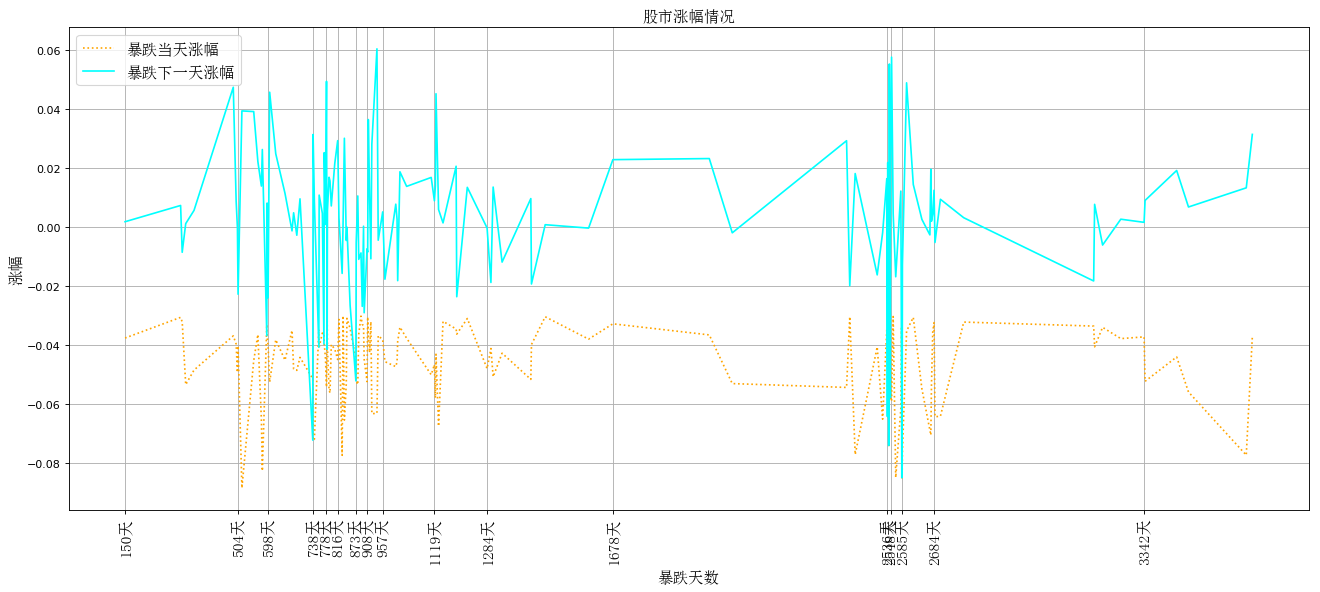

In [7]:
#（4）根据你的统计数据，你认为暴跌时，小明的爸爸是否应该“割肉”？
x = list(result1.index)
results = data.iloc[[i for i in x]]
result1_up = results["close"]/results["close_yesterday"]-1

y_1 = list(result1_up.values)
y_2 = list(result2_rate_of_increase.values)

#设置图片大小
plt.figure(figsize=(20,8),dpi=80)

#设置字体
my_font = FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc", size=14)

#绘制图片
plt.plot(x,y_1,label="暴跌当天涨幅",color="orange",linestyle=":")
plt.plot(x,y_2,label="暴跌下一天涨幅",color="cyan")

#设置x轴的刻度
x_labels = ["{}天".format(i) for i in x]
plt.xticks(x[::8],x_labels[::8],rotation=90,fontproperties=my_font)

#绘制表格
plt.grid(alpha=1) #alpha是表格透明度

#添加描述信息
plt.xlabel("暴跌天数",fontproperties=my_font)
plt.ylabel("涨幅",fontproperties=my_font)
plt.title("股市涨幅情况",fontproperties=my_font)

#添加图例
plt.legend(prop=my_font,loc="upper left") #loc默认为右上角


#展示图片
plt.show()

In [15]:
result_day1 = list(result1_up.values)
number_day1 = 0
for i in result_day1:
    number_day1+=i

result_day2 = list(result2_rate_of_increase.values)
number_day2 = 0
for i in result_day2:
    number_day2+=i

total = number_day1+number_day2
print(total)

-6.2048464675798085
0.24462467004656951
-5.960221797533239


In [ ]:
#由图和总涨幅得出应该割肉